### 

### 폭염 특보 가장 많이 발생한 지역 삼대장 찾기
- 근 3년간 6월 7월 8월 폭염 특보 가장 많이 발생한 지역 1위 2위 3위 뽑기
- 폭염 특보가 발령되는 기준
- 폭염특보가 많이 발생되는 이유
- 결론


In [1193]:
# 모듈 불러오기
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [1194]:
# 데이터 준비
# 출처 : 기상청
HW2206 = pd.read_csv('HW2206.csv')
HW2207 = pd.read_csv('HW2207.csv')
HW2208 = pd.read_csv('HW2208.csv')
HW2306 = pd.read_csv('HW2306.csv')
HW2307 = pd.read_csv('HW2307.csv')
HW2308 = pd.read_csv('HW2308.csv')
HW2406 = pd.read_csv('HW2406.csv')
HW2407 = pd.read_csv('HW2407.csv')

In [1195]:
# 파일 통합 함수 효준님작품.

def make_city_df(df, city):
    # 지점 컬럼에서 지역명만 빼기
    list_data = []

    for i in df['지점']:
        list_data.append(i.split('(')[0])

    df['지점'] = list_data
    return df[df['지점'] == city]

def concat_data(city):
    data = pd.concat([make_city_df(HW2206, city), 
            make_city_df(HW2207, city),
            make_city_df(HW2208, city), 
            make_city_df(HW2306, city),
            make_city_df(HW2307, city),
            make_city_df(HW2308, city),
            make_city_df(HW2406, city),
            make_city_df(HW2407, city)], ignore_index = True)
    return data

In [1196]:
seoul=concat_data('서울')
incheun=concat_data('인천')
busan=concat_data('부산')
ulsan=concat_data('울산')
daezon=concat_data('대전')
gangzu=concat_data('광주')
daegu=concat_data('대구')

In [1197]:
total=pd.concat([seoul,incheun,busan,ulsan,daezon,gangzu,daegu])

In [1198]:
total.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1659 entries, 0 to 236
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   일시          1659 non-null   object 
 1   지점          1659 non-null   object 
 2   폭염여부(O/X)   1659 non-null   object 
 3   최고체감온도(°C)  1658 non-null   float64
 4   최고기온(°C)    1653 non-null   float64
 5   평균기온(°C)    1652 non-null   float64
 6   최저기온(°C)    1657 non-null   float64
 7   평균상대습도(%)   1659 non-null   float64
 8   폭염특보(O/X)   1659 non-null   object 
 9   폭염영향예보(단계)  1659 non-null   object 
 10  열대야(O/X)    1659 non-null   object 
 11  자외선지수(단계)   1659 non-null   object 
dtypes: float64(5), object(7)
memory usage: 168.5+ KB


In [1199]:
total=total.reset_index(drop=True)


In [1200]:
# NaN 값 확인
total.isna().sum()

일시            0
지점            0
폭염여부(O/X)     0
최고체감온도(°C)    1
최고기온(°C)      6
평균기온(°C)      7
최저기온(°C)      2
평균상대습도(%)     0
폭염특보(O/X)     0
폭염영향예보(단계)    0
열대야(O/X)      0
자외선지수(단계)     0
dtype: int64

In [1201]:
# 비어있는 열은 ' ' 공백 값으로 되어있음.
# 나온 숫자들은 모두 NaN 결측치
# 온도에서 결측치가 나왔기 때문에 각 결측치 값에 그 열의 평균값을 넣어주기로 했음.
total['최고체감온도(°C)']=total['최고체감온도(°C)'].fillna(total['최고체감온도(°C)'].mean())
total['최고체감온도(°C)'].isna().sum()

0

In [1202]:
total['최고기온(°C)']=total['최고기온(°C)'].fillna(total['최고기온(°C)'].mean())
total['최고기온(°C)'].isna().sum()

0

In [1203]:
total['평균기온(°C)']=total['평균기온(°C)'].fillna(total['평균기온(°C)'].mean())
total['평균기온(°C)'].isna().sum()

0

In [1204]:
total['최저기온(°C)']=total['최저기온(°C)'].fillna(total['최저기온(°C)'].mean())
total['최저기온(°C)'].isna().sum()

0

In [1205]:
# 결측치 처리완료.
total.isna().sum()

일시            0
지점            0
폭염여부(O/X)     0
최고체감온도(°C)    0
최고기온(°C)      0
평균기온(°C)      0
최저기온(°C)      0
평균상대습도(%)     0
폭염특보(O/X)     0
폭염영향예보(단계)    0
열대야(O/X)      0
자외선지수(단계)     0
dtype: int64

In [1206]:
# 이상치 처리
total.describe()

,최고체감온도(°C),최고기온(°C),평균기온(°C),최저기온(°C),평균상대습도(%)
count,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000
mean,30.011460,29.283485,25.185775,21.941823,77.810669
std,3.000539,3.337555,2.794862,3.016094,11.703962
min,20.000000,18.300000,15.700000,11.800000,33.600000
25%,28.000000,26.950000,23.400000,19.900000,70.500000
50%,30.300000,29.400000,25.300000,22.400000,78.400000
75%,32.300000,31.800000,27.200000,24.200000,86.600000
max,37.200000,37.800000,31.600000,28.100000,100.000000


In [1207]:
total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1659 entries, 0 to 1658
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   일시          1659 non-null   object 
 1   지점          1659 non-null   object 
 2   폭염여부(O/X)   1659 non-null   object 
 3   최고체감온도(°C)  1659 non-null   float64
 4   최고기온(°C)    1659 non-null   float64
 5   평균기온(°C)    1659 non-null   float64
 6   최저기온(°C)    1659 non-null   float64
 7   평균상대습도(%)   1659 non-null   float64
 8   폭염특보(O/X)   1659 non-null   object 
 9   폭염영향예보(단계)  1659 non-null   object 
 10  열대야(O/X)    1659 non-null   object 
 11  자외선지수(단계)   1659 non-null   object 
dtypes: float64(5), object(7)
memory usage: 155.7+ KB


In [1208]:
#최고체감온도(°C)	최고기온(°C)	평균기온(°C)	최저기온(°C)	평균상대습도(%) 이상치 출력하기
numeric_total=total.select_dtypes(include=[np.number])
for col in numeric_total.columns:
    Q1 = numeric_total[col].quantile(0.25)
    Q3 = numeric_total[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    col_outliers = numeric_total[(numeric_total[col] < lower_bound) | (numeric_total[col] > upper_bound)]

    outliers = pd.concat([outliers, col_outliers])

In [1209]:
outliers

,일시,지점,폭염여부(O/X),최고체감온도(°C),최고기온(°C),평균기온(°C),최저기온(°C),평균상대습도(%),폭염특보(O/X),폭염영향예보(단계),열대야(O/X),자외선지수(단계)
13,2022.6.14,부산,X,21.2,18.4,17.3,16.8,94.5,X,,X,보통
6,2022.6.7,울산,X,20.0,18.8,15.7,12.7,82.3,X,,X,낮음
7,2022.6.8,울산,X,20.3,19.0,16.3,13.9,81.4,X,,X,높음
13,2022.6.14,울산,X,20.5,18.3,16.9,15.9,95.0,X,,X,보통
92,2023.6.1,울산,X,21.3,20.4,16.3,12.8,87.4,X,,X,높음
...,...,...,...,...,...,...,...,...,...,...,...,...
1422,NaN,NaN,NaN,29.3,33.1,24.7,18.7,39.6,NaN,NaN,NaN,NaN
1423,NaN,NaN,NaN,30.0,33.5,26.1,17.5,44.5,NaN,NaN,NaN,NaN
1517,NaN,NaN,NaN,26.7,29.9,23.9,17.5,40.5,NaN,NaN,NaN,NaN
1623,NaN,NaN,NaN,31.8,35.4,28.3,19.5,41.6,NaN,NaN,NaN,NaN


In [1210]:
outliers.sort_index().describe()
# total 값과 비교 해봤을 때 정상적인 범위내라고 판단 이상치 제거 하지 않기로 함.

,최고체감온도(°C),최고기온(°C),평균기온(°C),최저기온(°C),평균상대습도(%)
count,1824.000000,1824.000000,1824.000000,1824.000000,1824.000000
mean,23.579550,23.542270,19.285800,15.579441,72.286732
std,3.526185,5.500633,3.685482,2.410195,20.224720
min,20.000000,18.300000,15.700000,11.800000,33.600000
25%,21.100000,19.100000,16.900000,13.900000,45.300000
50%,22.000000,21.000000,17.500000,15.000000,78.400000
75%,26.200000,28.200000,22.300000,16.800000,90.500000
max,33.100000,36.800000,29.400000,23.400000,95.000000


In [1211]:
# 중복 데이터 확인
total.duplicated().sum()
# 중복 데이터 없음.

0

In [1212]:
total

,일시,지점,폭염여부(O/X),최고체감온도(°C),최고기온(°C),평균기온(°C),최저기온(°C),평균상대습도(%),폭염특보(O/X),폭염영향예보(단계),열대야(O/X),자외선지수(단계)
0,2022.6.1,서울,X,26.1,28.600000,22.100000,16.2,41.6,X,,X,매우높음
1,2022.6.2,서울,X,27.0,26.900000,21.500000,17.1,67.4,X,,X,매우높음
2,2022.6.3,서울,X,30.7,32.600000,24.500000,18.7,62.8,X,,X,매우높음
3,2022.6.4,서울,X,28.8,29.700000,25.600000,20.3,57.0,X,,X,높음
4,2022.6.5,서울,X,26.1,27.000000,22.700000,20.2,59.8,X,,X,보통
...,...,...,...,...,...,...,...,...,...,...,...,...
1654,2024.7.19,대구,X,31.3,30.800000,27.300000,24.2,77.0,X,관심,X,낮음
1655,2024.7.20,대구,X,31.6,30.600000,26.900000,24.0,79.8,O,관심,O,낮음
1656,2024.7.21,대구,O,34.2,34.400000,29.700000,25.9,71.1,O,주의,O,낮음
1657,2024.7.22,대구,O,34.0,34.200000,30.100000,25.9,67.4,O,주의,O,낮음


In [1213]:
#폭염 특보 발령 빈도수
fokyum=total[total['폭염특보(O/X)'] == 'O']
fokyum['지점'].value_counts()


지점
대구    125
광주    119
대전     82
부산     76
서울     73
울산     68
인천     50
Name: count, dtype: int64

In [1214]:
fokyum.reset_index(drop=True)

,일시,지점,폭염여부(O/X),최고체감온도(°C),최고기온(°C),평균기온(°C),최저기온(°C),평균상대습도(%),폭염특보(O/X),폭염영향예보(단계),열대야(O/X),자외선지수(단계)
0,2022.6.25,서울,X,31.9,30.500000,26.000000,21.5,80.4,O,관심,X,매우높음
1,2022.6.26,서울,X,30.1,28.100000,26.500000,24.8,82.1,O,관심,O,높음
2,2022.7.1,서울,X,31.8,30.900000,26.600000,21.9,83.3,O,관심,X,높음
3,2022.7.2,서울,O,33.7,33.800000,28.800000,24.0,72.8,O,주의,X,매우높음
4,2022.7.3,서울,O,33.7,34.200000,29.300000,24.4,68.6,O,주의,O,매우높음
...,...,...,...,...,...,...,...,...,...,...,...,...
588,2024.7.8,대구,X,30.5,29.200000,27.200000,26.2,82.4,O,주의,X,낮음
589,2024.7.20,대구,X,31.6,30.600000,26.900000,24.0,79.8,O,관심,O,낮음
590,2024.7.21,대구,O,34.2,34.400000,29.700000,25.9,71.1,O,주의,O,낮음
591,2024.7.22,대구,O,34.0,34.200000,30.100000,25.9,67.4,O,주의,O,낮음


In [1215]:
# 시각화해보기.
# 근 3년간 폭염특보 발생한 빈도수 

foksr=fokyum['지점'].value_counts()
x=foksr.index.tolist()
h=foksr.values.tolist()

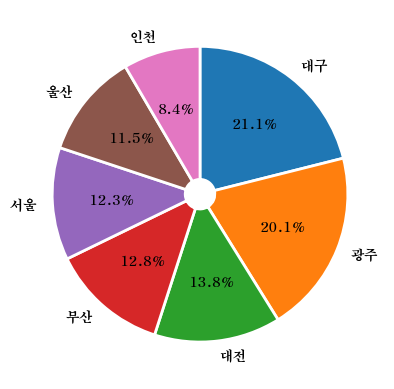

In [1216]:
# 한글패치
import df_dfutil as ut
ut.kor_font(r'C:\Windows\Fonts\H2MJRE.TTF')
# pie 그래프 그려보기 
plt.pie(h, labels=['대구','광주','대전','부산','서울','울산','인천'], autopct='%.1f%%',startangle=90,counterclock=False,
        wedgeprops={'linewidth':2, 'width':0.9, 'edgecolor':'w'})
plt.show()

In [1217]:
# 근 3년간 전체 폭염 특보 중 대구가 21.1%으로 가장 많음.
 
# 왜 대구는 다른지역보다 폭염특보가 더 많이 발생 했을까 분석.


In [1218]:
# 폭염특보 발령 기준
#  기온과 습도를 고려하는 체감온도 기준으로 33℃ 또는 최고기온이 35℃ 이상이 2일 이상 지속이 예상되거나, 
#  중대한 피해 발생이 예상될 때 폭염특보(폭염주의보와 경보)를 발표합니다.


In [1219]:
# 폭염특보 발령한날 특징을 분석하기
# 최고기온, 습도, 체감온도
fokyum

,일시,지점,폭염여부(O/X),최고체감온도(°C),최고기온(°C),평균기온(°C),최저기온(°C),평균상대습도(%),폭염특보(O/X),폭염영향예보(단계),열대야(O/X),자외선지수(단계)
24,2022.6.25,서울,X,31.9,30.500000,26.000000,21.5,80.4,O,관심,X,매우높음
25,2022.6.26,서울,X,30.1,28.100000,26.500000,24.8,82.1,O,관심,O,높음
30,2022.7.1,서울,X,31.8,30.900000,26.600000,21.9,83.3,O,관심,X,높음
31,2022.7.2,서울,O,33.7,33.800000,28.800000,24.0,72.8,O,주의,X,매우높음
32,2022.7.3,서울,O,33.7,34.200000,29.300000,24.4,68.6,O,주의,O,매우높음
...,...,...,...,...,...,...,...,...,...,...,...,...
1643,2024.7.8,대구,X,30.5,29.200000,27.200000,26.2,82.4,O,주의,X,낮음
1655,2024.7.20,대구,X,31.6,30.600000,26.900000,24.0,79.8,O,관심,O,낮음
1656,2024.7.21,대구,O,34.2,34.400000,29.700000,25.9,71.1,O,주의,O,낮음
1657,2024.7.22,대구,O,34.0,34.200000,30.100000,25.9,67.4,O,주의,O,낮음


In [1220]:
# '대구','광주','대전','부산','서울','울산','인천' 평균 구하기
def city_list(city):
    seoul=total[total['지점']==city]
    seoul=seoul.select_dtypes(include=np.number)
    soeul=round(seoul.mean(),1)
    return soeul.tolist()

soeul=city_list('서울')
daegu=city_list('대구')
gangzu=city_list('광주')
daezon=city_list('대전')
incheun=city_list('인천')
ulsan=city_list('울산')
busan=city_list('부산')


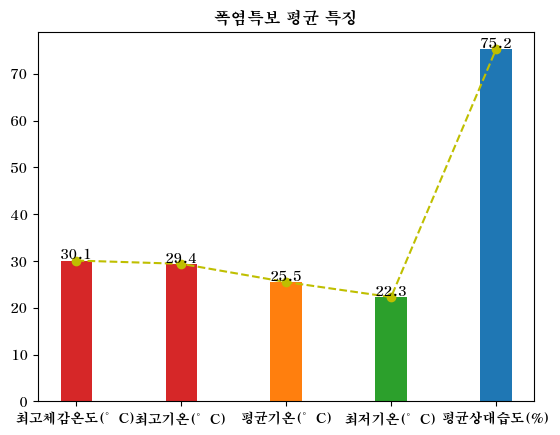

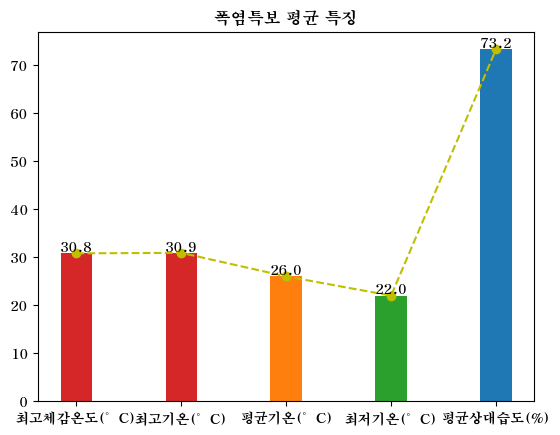

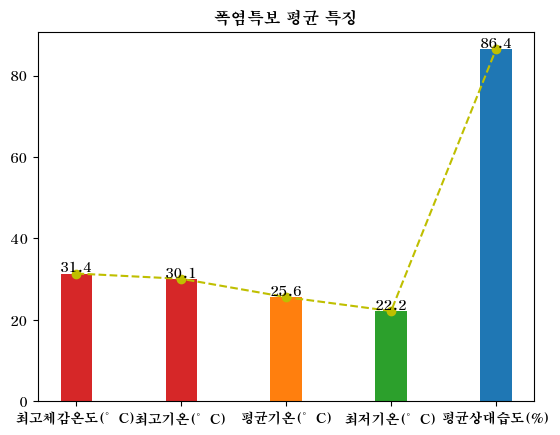

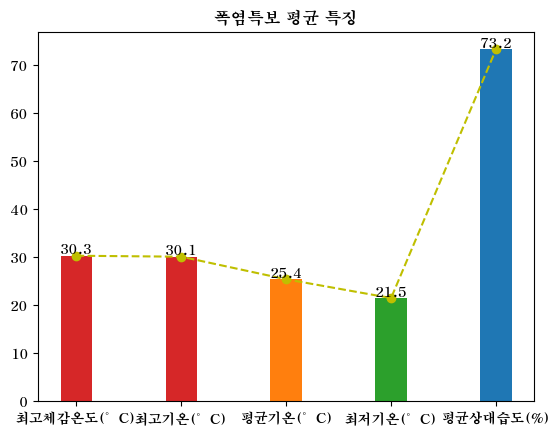

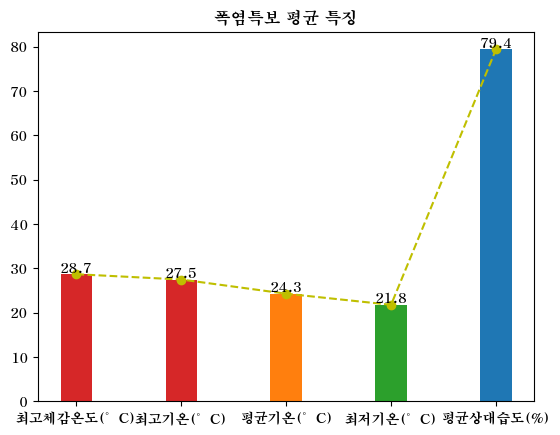

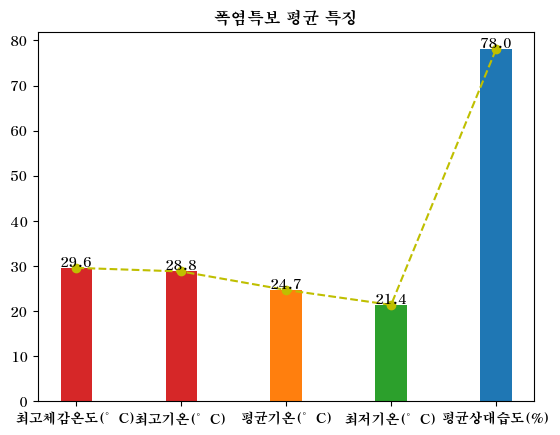

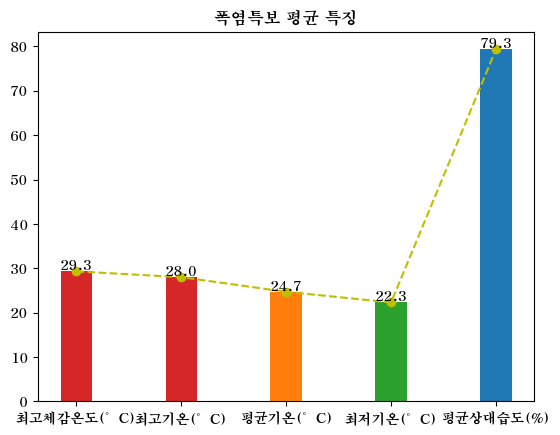

In [1221]:
# 데이터 그래프화
def city_bar(city):
    x = ['최고체감온도(°C)','최고기온(°C)','평균기온(°C)','최저기온(°C)','평균상대습도(%)']
    y = city
    bar_labels = ['red', 'red', 'orange', 'green','blue']
    bar_colors = ['tab:red', 'tab:red', 'tab:orange', 'tab:green','tab:blue']

    # 데이터 시각화 수직 막대 + 선 그래프
    bar=plt.bar(x, y, width=0.3, color=bar_colors, label=bar_labels)
    #        x      y(높이)      좌우막대        색깔
    plt.bar_label(bar,city)
    plt.title('폭염특보 평균 특징')
    plt.plot(y, 'yo--')
    plt.show()

city_bar(soeul)
city_bar(daegu)
city_bar(gangzu)
city_bar(daezon)
city_bar(incheun)
city_bar(ulsan)
city_bar(busan)


In [1222]:
# 대구와 광주는 폭염 특보가 많았던 이유가 열이 유지되는 시간이 길었던 반면에
# 다른지역은 열이 유지되는 시간이 짧아서 폭염특보가 상대적으로 적게 발생했다.


In [1226]:
fokso1=fokyum[fokyum['지점']=='서울']
fokso1=fokso1[['일시','최고체감온도(°C)']]

pd.set_option('display.max_rows', 100)
fokso1.reset_index(drop=True)



,일시,최고체감온도(°C)
0,2022.6.25,31.9
1,2022.6.26,30.1
2,2022.7.1,31.8
3,2022.7.2,33.7
4,2022.7.3,33.7
5,2022.7.4,33.1
6,2022.7.5,33.7
7,2022.7.6,34.1
8,2022.7.7,32.7
9,2022.7.9,32.0


In [1227]:
fokso=fokyum[fokyum['지점']=='광주']
fokso=fokso[['일시','최고체감온도(°C)']]

pd.set_option('display.max_rows', 200)
fokso.reset_index(drop=True)

,일시,최고체감온도(°C)
0,2022.6.19,32.00000
1,2022.6.20,33.30000
2,2022.6.21,34.00000
3,2022.6.22,33.60000
4,2022.6.25,32.30000
5,2022.6.26,33.20000
6,2022.6.27,32.00000
7,2022.6.28,32.40000
8,2022.6.30,32.80000
9,2022.7.1,34.00000


In [ ]:
# 폭염특보가 발령될 땐 2일이상 체감온도가 33도 이상이거나 중대한 피해가 예상될 때 발령됩니다.
# 위 데이터 프레임을 참고하면 폭염특보가 발령되고나서 온도가 약 3도가 내려가기 전까지 폭염특보가 유지가 됩니다.

# 대구는 최고기온 발생 빈도수가 많았고, 온도가 유지되는 구간이 타지역보다 길기 때문에 빈도수가 더 많이 나타났었습니다.
# 광주도 대구와 비슷한 경우 였습니다.

# 온도가 유지되는 기간이 긴 이유
# 광주와 대구는 내륙지방이라 해양의 영향이 적고, 대구는 분지지형이기 까지해서 온도가 잘안내려가는 경우를 보였습니다.
# 그리고 기후의 영향으로 여름철에 고기압으로 맑은 날이 많고, 강한 일사량을 받아 고온현상이 강화됩니다.
# 해발 고도도 상대적으로 낮아 대류가 약하고, 열이 쌓이는 구조라 열이 빠져나가기 어려운 상황이 많습니다.

# 타지역 같은 경우에는 빈도수가 대구와 광주에 비해서 적게 나타났고, 온도가 유지되는 기간이 짧아서 빈도수가 적게 나타났었습니다.

# 온도가 유지되는 기간이 대구와 광주에 비해 짧은 이유
# 서울은 한강을 중심으로 한 수많은 물길과 인접 산지로 인해 공기의 순환이 원활합니다.
# 대전은 서해안에서 불어오는 바람이 대전에 도달해 기온을 낮추는 효과가 있습니다.
# 인천과 부산, 울산은 해양 영향으로 바다에서 불어오는 시원한 바람의 영향을 받습니다.

# 결론 : 폭염특보가 가장 많이 나타나는 삼대장 지역은 1위 대구 2위 광주 3위 대전 이였습니다.
# 그중 대구와 광주가 온도가 유지되는 기간이 길어서 가장 많이 나타났습니다.
# 여러분 더위 조심하세요...

